# UMAP tutorial

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import umap

## Penguins example

In [4]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins.dropna(inplace=True)
penguins.species_short.value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species_short, dtype: int64

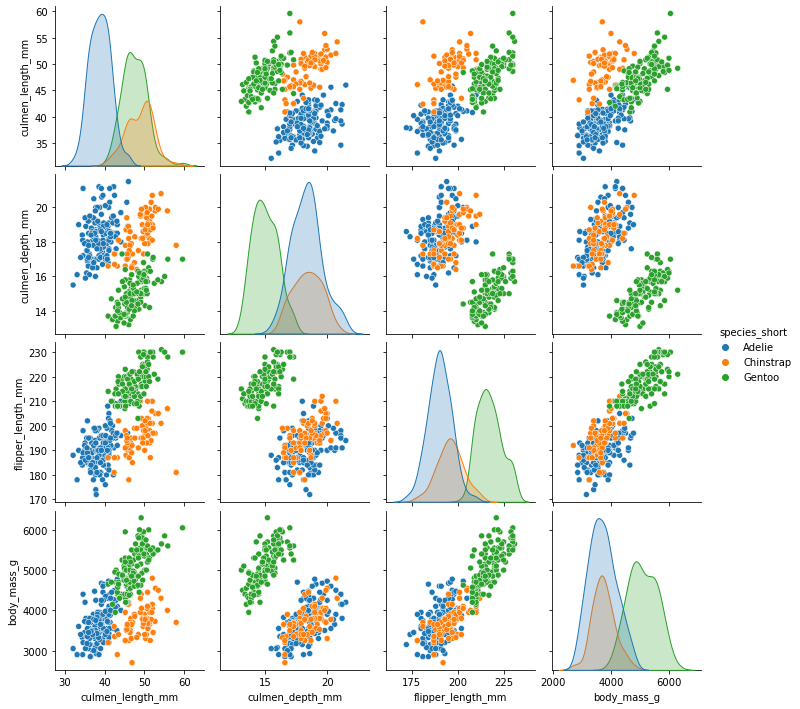

In [10]:
sns.pairplot(penguins, hue='species_short')

## UMAP for dimension reduction

Create a UMAP object

In [14]:
reducer = umap.UMAP()

We clean the data a bit. We bring the columns into the same range via standardization

In [16]:
penguin_data = penguins[[
        "culmen_length_mm",
        "culmen_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]].values
scaled_peguin_data = StandardScaler().fit_transform(penguin_data)

In [17]:
embedding = reducer.fit_transform(scaled_peguin_data)
type(embedding)

numpy.ndarray

In [19]:
embedding.shape

(334, 2)

Note that we are down two 2 dimensions from the original 4.

- UMAP reduces to 2d by default

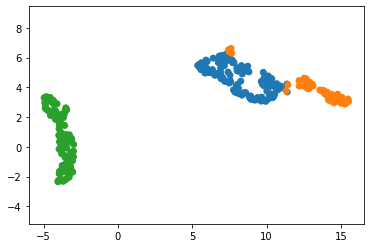

In [41]:
plt.scatter(x=embedding[:,0], y=embedding[:,1],
 c=[sns.color_palette()[x] for x in penguins.species_short.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})])
plt.gca().set_aspect('equal','datalim')
plt.show()

## Digits example

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
type(digits)

sklearn.utils.Bunch

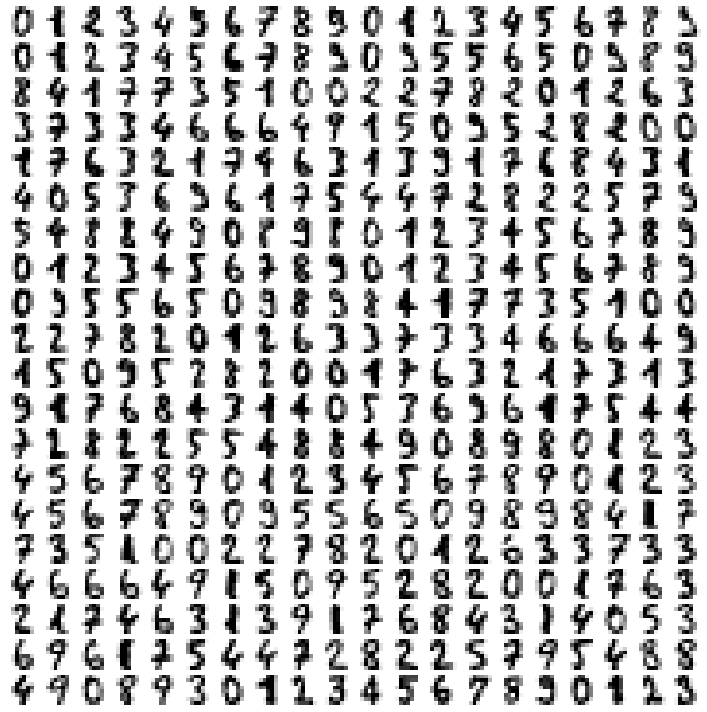

In [24]:
fig, ax_array = plt.subplots(20,20, figsize=(10,10), frameon=False)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)
plt.show()

Using UMAP

In [26]:
reducer = umap.UMAP(random_state=42)
reducer.fit(digits.data)
embedding = reducer.transform(digits.data)

Verify that the result of calling transform is idenitical to accessing the `embedding_` attribute

In [31]:
assert(np.all(embedding == reducer.embedding_))

In [32]:
embedding.shape

(1797, 2)

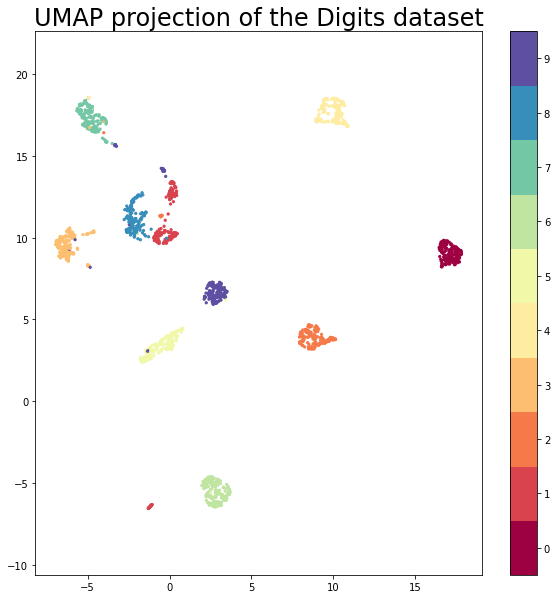

In [46]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0], embedding[:,1], c=digits.target, cmap='Spectral',s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Digits dataset', fontsize=24);